# Import library

In [29]:
import pandas as pd
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Data Preprocessing

In [30]:
df = pd.read_csv("citizeninfo_health_20200314.csv")
df.isnull().sum()

รหัสหน่วยงาน                0
กระทรวง                     0
กรม                         0
หน่วยงาน                    0
หมุดที่ไม่พบความผิดปกติ     0
ที่อยู่จุดบริการ           92
ละติจูด                    92
ลองติจูด                   92
dtype: int64

In [31]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10622 entries, 0 to 10621
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   รหัสหน่วยงาน             10622 non-null  int64  
 1   กระทรวง                  10622 non-null  object 
 2   กรม                      10622 non-null  object 
 3   หน่วยงาน                 10622 non-null  object 
 4   หมุดที่ไม่พบความผิดปกติ  10622 non-null  object 
 5   ที่อยู่จุดบริการ         10622 non-null  object 
 6   ละติจูด                  10622 non-null  float64
 7   ลองติจูด                 10622 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 664.0+ KB


,รหัสหน่วยงาน,กระทรวง,กรม,หน่วยงาน,หมุดที่ไม่พบความผิดปกติ,ที่อยู่จุดบริการ,ละติจูด,ลองติจูด
0,8899021500001,กระทรวงกลาโหม,กรมแพทย์ทหารบก,โรงพยาบาลค่ายพิชัยดาบหัก,Y,102 หมู่ 8 ต.ท่าเสา อ.เมืองอุตรดิตถ์ จ.อุตรดิต...,17.662624,100.138907
1,8899021200001,กระทรวงกลาโหม,กรมแพทย์ทหารเรือ,โรงพยาบาลทหารเรือกรุงเทพ,Y,224 ถนนริมทางรถไฟเก่า แขวงบางนา เขตบางนา กรุงเ...,13.670278,100.588009
2,111020400029,กระทรวงกลาโหม,กองทัพบก,กองทัพบก โรงพยาบาลพระมงกุฎเกล้า,Y,แขวงทุ่งพญาไท เขตราชเทวี กรุงเทพมหานคร 10400,13.767327,100.534169


In [32]:
provs = []

for i in range(len(df)):
    prov = df['ที่อยู่จุดบริการ'][i].split()[-2]
    provs.append(prov)

df['จังหวัด'] = provs
df

,รหัสหน่วยงาน,กระทรวง,กรม,หน่วยงาน,หมุดที่ไม่พบความผิดปกติ,ที่อยู่จุดบริการ,ละติจูด,ลองติจูด,จังหวัด
0,8899021500001,กระทรวงกลาโหม,กรมแพทย์ทหารบก,โรงพยาบาลค่ายพิชัยดาบหัก,Y,102 หมู่ 8 ต.ท่าเสา อ.เมืองอุตรดิตถ์ จ.อุตรดิต...,17.662624,100.138907,จ.อุตรดิตถ์
1,8899021200001,กระทรวงกลาโหม,กรมแพทย์ทหารเรือ,โรงพยาบาลทหารเรือกรุงเทพ,Y,224 ถนนริมทางรถไฟเก่า แขวงบางนา เขตบางนา กรุงเ...,13.670278,100.588009,กรุงเทพมหานคร
2,111020400029,กระทรวงกลาโหม,กองทัพบก,กองทัพบก โรงพยาบาลพระมงกุฎเกล้า,Y,แขวงทุ่งพญาไท เขตราชเทวี กรุงเทพมหานคร 10400,13.767327,100.534169,กรุงเทพมหานคร
3,113020400030,กระทรวงกลาโหม,กองทัพบก,กองทัพบก โรงพยาบาลอานันทมหิดล,Y,ต.เขาสามยอด อ.เมืองลพบุรี จ.ลพบุรี 15000,14.849659,100.666970,จ.ลพบุรี
4,8899020600012,กระทรวงกลาโหม,กองทัพอากาศ,โรงพยาบาลภูมิพลอดุลยเดช กรมแพทย์ทหารอากาศ,Y,แขวงคลองถนน เขตสายไหม กรุงเทพมหานคร 10220,13.909294,100.618019,กรุงเทพมหานคร
...,...,...,...,...,...,...,...,...,...
10617,8899417700034,กรุงเทพมหานคร,สำนักอนามัย,ศูนย์บริการสาธารณสุข 21 วัดธาตุทอง,Y,ถนนสุขุมวิท แขวงพระโขนง เขตคลองเตย กรุงเทพมหาน...,13.719146,100.585634,กรุงเทพมหานคร
10618,8899417700072,กรุงเทพมหานคร,สำนักอนามัย,ศูนย์บริการสาธารณสุข 59 ทุ่งครุ,Y,บ้านเลขที่ 46 ศูนย์บริการสาธารณสุข 59 ทุ่งครุ ...,13.607237,100.506656,กรุงเทพมหานคร
10619,8899417700052,กรุงเทพมหานคร,สำนักอนามัย,ศูนย์บริการสาธารณสุข 39 ราษฎร์บูรณะ,Y,ถนนราษฎร์บูรณะ แขวงราษฎร์บูรณะ เขตราษฎร์บูรณะ ...,13.680928,100.506805,กรุงเทพมหานคร
10620,8899417700073,กรุงเทพมหานคร,สำนักอนามัย,ศูนย์บริการสาธารณสุข 60 รสสุคนธ์ มโนชญากรณ์,Y,60 ซอยสรงประภา 11 แขวงดอนเมือง เขตดอนเมือง กรุ...,13.925453,100.580734,กรุงเทพมหานคร


In [33]:
df['จังหวัด'].unique()

array(['จ.อุตรดิตถ์', 'กรุงเทพมหานคร', 'จ.ลพบุรี', 'จ.อุดรธานี',
       'จ.ขอนแก่น', 'จ.ปทุมธานี', 'จ.ชลบุรี', 'จ.สงขลา', 'จ.ปัตตานี',
       'จ.เชียงใหม่', 'จ.ตรัง', 'จ.นครปฐม', 'จ.แม่ฮ่องสอน', 'จ.นครสวรรค์',
       'จังหวัดสงขลา', 'จ.สมุทรปราการ', 'จ.นครราชสีมา', 'จ.นครพนม',
       'จังหวัดเชียงใหม่', 'จ.อุบลราชธานี', 'จ.สุราษฎร์ธานี', 'จ.เลย',
       'จ.นนทบุรี', 'จ.สระแก้ว', 'จ.เพชรบุรี', 'จ.ระยอง', 'จ.สุรินทร์',
       'จ.ฉะเชิงเทรา', 'จ.ลำปาง', 'จ.นครศรีธรรมราช', 'จ.ปราจีนบุรี',
       'จ.ตาก', 'จ.อำนาจเจริญ', 'จ.จันทบุรี', 'จ.ตราด', 'จ.เพชรบูรณ์',
       'จ.พระนครศรีอยุธยา', 'จ.มุกดาหาร', 'จ.เชียงราย', 'จ.กำแพงเพชร',
       'จ.ชัยนาท', 'จ.พิษณุโลก', 'จ.พัทลุง', 'จ.ร้อยเอ็ด', 'จ.ศรีสะเกษ',
       'จ.กาฬสินธุ์', 'จ.บุรีรัมย์', 'จ.พะเยา', 'จ.สกลนคร', 'จ.น่าน',
       'จ.สุโขทัย', 'จ.หนองคาย', 'จ.ราชบุรี', 'จ.สตูล', 'จ.พิจิตร',
       'จ.มหาสารคาม', 'จ.ชัยภูมิ', 'จ.แพร่', 'จ.ยะลา', 'จ.กระบี่',
       'จ.บึงกาฬ', 'จ.หนองบัวลำภู', 'จ.ระนอง', 'จ.สระบุรี', 'จ.ยโสธร',
       'จ.สุพรรณบุร

In [34]:
df['จังหวัด'] = np.where(df['จังหวัด'] == '75120','จ.สมุทรสงคราม',df['จังหวัด'])
df['จังหวัด'] = np.where(df['จังหวัด'] == 'กทม.','กรุงเทพมหานคร',df['จังหวัด'])
df['จังหวัด'] = np.where(df['จังหวัด'] == 'จังหวัดนครสวรรค์','จ.นครสวรรค์',df['จังหวัด'])
df['จังหวัด'] = np.where(df['จังหวัด'] == 'จังหวัดเชียงใหม่','จ.เชียงใหม่',df['จังหวัด'])
df['จังหวัด'] = np.where(df['จังหวัด'] == 'จังหวัดสงขลา','จ.สงขลา',df['จังหวัด'])
df['จังหวัด'] = np.where(df['จังหวัด'] == 'อ.บ้านแพง','จ.นครพนม',df['จังหวัด'])
len(df['จังหวัด'].unique())

for i in range(len(df['จังหวัด'])):
    df['จังหวัด'][i] = df['จังหวัด'][i].replace('จ.','')

In [35]:
df['ภาค'] = df['จังหวัด']

for i in range(len(df['ภาค'])):
    for j in ['เชียงราย','เชียงใหม่', 'น่าน', 'พะเยา', 
              'แพร่', 'แม่ฮ่องสอน','ลำปาง','ลำพูน', 'อุตรดิตถ์']:
        if df['จังหวัด'][i] == j:
            df['ภาค'][i] = 'ภาคเหนือ'

for i in range(len(df['ภาค'])):
    for j in ['กาฬสินธุ์' ,'ขอนแก่น' ,'ชัยภูมิ','นครพนม' 
              ,'นครราชสีมา','บึงกาฬ' ,'บุรีรัมย์' ,'มหาสารคาม' 
              ,'มุกดาหาร' ,'ยโสธร' ,'ร้อยเอ็ด' ,'เลย' ,'สกลนคร' 
              ,'สุรินทร์' ,'ศรีสะเกษ' ,'หนองคาย' ,'หนองบัวลำภู','อุดรธานี' 
              ,'อุบลราชธานี','อำนาจเจริญ']:
        if df['จังหวัด'][i] == j:
            df['ภาค'][i] = 'ภาคอีสาน'
            
for i in range(len(df['ภาค'])):
    for j in ['จันทบุรี','ฉะเชิงเทรา','ชลบุรี'
              ,'ตราด','ปราจีนบุรี','ระยอง','สระแก้ว']:
        if df['จังหวัด'][i] == j:
            df['ภาค'][i] = 'ภาคตะวันออก'
            
for i in range(len(df['ภาค'])):
    for j in ['กาญจนบุรี','ตาก','ประจวบคีรีขันธ์','เพชรบุรี','ราชบุรี']:
        if df['จังหวัด'][i] == j:
            df['ภาค'][i] = 'ภาคตะวันตก'
            
            
for i in range(len(df['ภาค'])):
    for j in ['กระบี่','ชุมพร','ตรัง','นครศรีธรรมราช'
              ,'นราธิวาส','ปัตตานี','พังงา','พัทลุง'
              ,'ภูเก็ต','ระนอง','สตูล','สงขลา','สุราษฎร์ธานี'
              ,'ยะลา']:
        if df['จังหวัด'][i] == j:
            df['ภาค'][i] = 'ภาคใต้'
            
for i in range(len(df['ภาค'])):
    for j in ['กำแพงเพชร','ชัยนาท' ,'นครนายก' ,'นครปฐม' 
              ,'นครสวรรค์' ,'นนทบุรี' ,'ปทุมธานี' ,'พระนครศรีอยุธยา' 
              ,'พิจิตร' ,'พิษณุโลก' ,'เพชรบูรณ์','ลพบุรี' ,'สมุทรปราการ'
              ,'สมุทรสงคราม' ,'สมุทรสาคร','สิงห์บุรี','สุโขทัย','สุพรรณบุรี' 
              ,'สระบุรี','อ่างทอง' ,'อุทัยธานี','กรุงเทพมหานคร']:
        if df['จังหวัด'][i] == j:
            df['ภาค'][i] = 'ภาคกลาง'
            

In [36]:
df_analyse = df.drop(columns = ['รหัสหน่วยงาน','หมุดที่ไม่พบความผิดปกติ','ละติจูด','ลองติจูด','ที่อยู่จุดบริการ'])

# Analyse 1

In [42]:
df_analyse.head()

,กระทรวง,กรม,หน่วยงาน,จังหวัด,ภาค
0,กระทรวงกลาโหม,กรมแพทย์ทหารบก,โรงพยาบาลค่ายพิชัยดาบหัก,อุตรดิตถ์,ภาคเหนือ
1,กระทรวงกลาโหม,กรมแพทย์ทหารเรือ,โรงพยาบาลทหารเรือกรุงเทพ,กรุงเทพมหานคร,ภาคกลาง
2,กระทรวงกลาโหม,กองทัพบก,กองทัพบก โรงพยาบาลพระมงกุฎเกล้า,กรุงเทพมหานคร,ภาคกลาง
3,กระทรวงกลาโหม,กองทัพบก,กองทัพบก โรงพยาบาลอานันทมหิดล,ลพบุรี,ภาคกลาง
4,กระทรวงกลาโหม,กองทัพอากาศ,โรงพยาบาลภูมิพลอดุลยเดช กรมแพทย์ทหารอากาศ,กรุงเทพมหานคร,ภาคกลาง


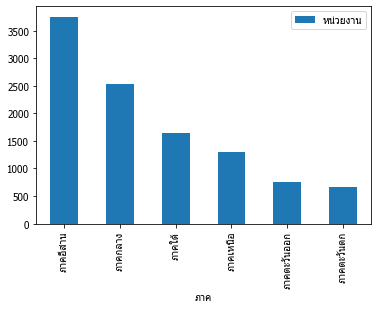

In [38]:
plt.rcParams['font.family'] = 'tahoma'

df_analyse.pivot_table('หน่วยงาน',['ภาค'],margins=False,aggfunc='count').sort_values(by='หน่วยงาน', ascending=False).plot(kind='bar')



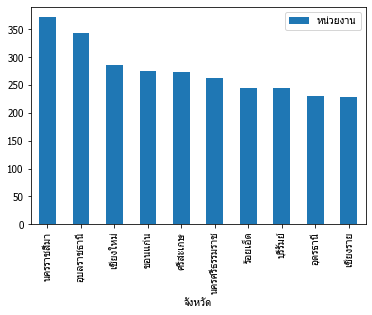

In [46]:
a = df_analyse.pivot_table('หน่วยงาน',['จังหวัด'],margins=False,aggfunc='count').sort_values(by='หน่วยงาน', ascending=False)
a[0:10].plot(kind='bar')
plt.show()

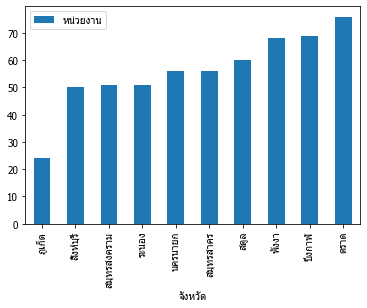

In [50]:
b = df_analyse.pivot_table('หน่วยงาน',['จังหวัด'],margins=False,aggfunc='count').sort_values(by='หน่วยงาน', ascending=True)
b[0:10].plot(kind='bar')
plt.show()

In [40]:
df_analyse.pivot_table('หน่วยงาน',['กระทรวง','กรม'],margins=False,aggfunc='count').sort_values(by='หน่วยงาน', ascending=False)

หน่วยงาน
กระทรวง               กรม                                       
กระทรวงสาธารณสุข      สำนักงานปลัดกระทรวงสาธารณสุข         10498
กรุงเทพมหานคร         สำนักอนามัย                             67
                      สำนักการแพทย์                           20
กระทรวงสาธารณสุข      กรมการแพทย์                             15
                      กรมสุขภาพจิต                            12
กระทรวงกลาโหม         กองทัพบก                                 2
สำนักงานตำรวจแห่งชาติ โรงพยาบาลตำรวจ                           2
กระทรวงกลาโหม         กรมแพทย์ทหารบก                           1
                      กรมแพทย์ทหารเรือ                         1
                      กองทัพอากาศ                              1
                      องค์การสงเคราะห์ทหารผ่านศึก              1
กระทรวงยุติธรรม       กรมราชทัณฑ์                              1
กระทรวงสาธารณสุข      โรงพยาบาลบ้านแพ้ว (องค์การมหาชน)         1

In [41]:
df_analyse[df_analyse['กรม'] == 'กรมสุขภาพจิต'].pivot_table('หน่วยงาน',['จังหวัด'],margins=False,aggfunc='count').sort_values(by='หน่วยงาน', ascending=False)

,หน่วยงาน
จังหวัด,
ขอนแก่น,1
นครพนม,1
นครราชสีมา,1
นครสวรรค์,1
นนทบุรี,1
สงขลา,1
สมุทรปราการ,1
สระแก้ว,1
สุราษฎร์ธานี,1
